# <div><center>****CUSTOMER SEGMENTATION ANALYSIS USING KMEANS ALGORITHM****</center></div>
---

This notebook performs customer segmentation using the **Mall Customers** dataset. 
We aim to explore customer behavior and group them into distinct clusters based on their characteristics such as:
- **Age**
- **Annual Income**
- **Spending Score**

The analysis includes:
1. **Data Loading and Cleaning**
2. **Exploratory Data Analysis (EDA)**
3. **Clustering using K-Means**
---

---
### **IMPORTING REQUIRED LIBRARIES**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set_theme(style="whitegrid")

---
### **LOADING THE DATASET**

In [20]:
df = pd.read_csv("Data/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
# Renaming the columns for better understanding
df.rename({"Genre":"Gender"},inplace=True,axis=1)

---
### **EXPLORATORY DATA ANALYSIS**

In this section we will:

- Analyze the structure and distribution of the data.
- Examine key descriptive statistics of the data.
- Find out duplicate or missing values in the data
- Create pair plots to visualize the distribution and relationships between key variables.
- Plot a correlation heatmap to understand the relationships between numeric features.

In [22]:
# Looking at first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As we can see the dataset has 5 rows, 1 categorical and 4 numerical with customer id acting as a unique identifier for each customer.

In [23]:
# Creating a function to get the basic information about the dataset
def basic_info(df):
    """
    This function takes a dataset as input and returns the basic information about the
    dataset such as the number of rows and columns, the number of duplicate & null rows, the
    descriptive statistics of the numeric features and the information about the dataset.
    """
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print("This dataseet has ", df.isnull().sum().sum(), " missing values.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [24]:
basic_info(df)

This dataset has  5  columns and  200  rows.
This dataset has  0  duplicated rows.
This dataseet has  0  missing values.
 
Descriptive statistics of the numeric features in the dataset: 
 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #  

From the above info we can conclude that:

- The dataset dont contain any duplicate or null entry indicating that data is clean.
- Age of the customers seems to be rightly skewed as median is lesser than the mean with majority being less than 49 years.
- Income and spending distribution seems to be symetrically distributed as there mean and median are close to each other.
- All the columms are in correct data format so no need to change them.


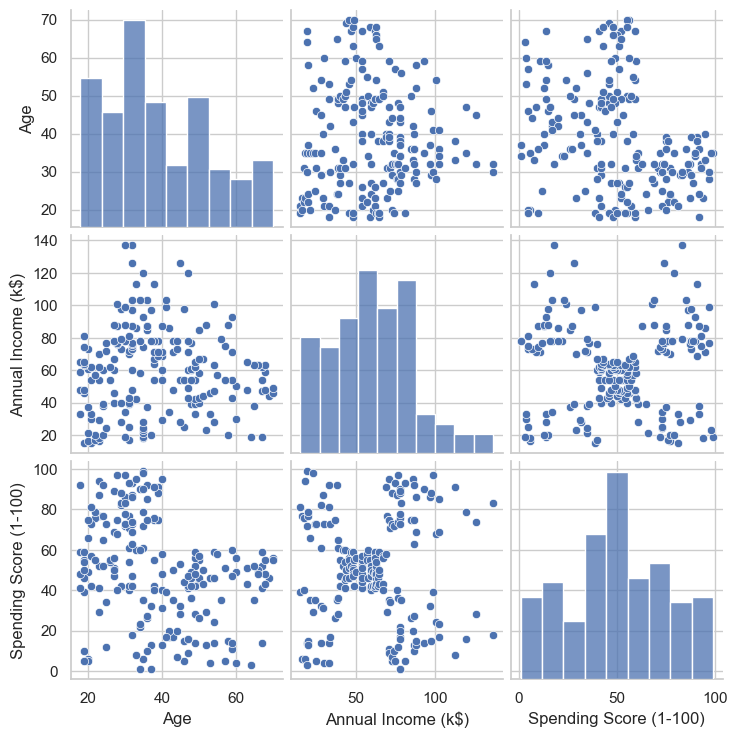

In [25]:
# Plotting the distribution and scatter plot to analyse distribution and correlation
figure = sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
figure.savefig('distribution.png', dpi=400)


**<u>Distribution</u>**

- As can be seen the dataset seems to be dominated by younger people following a bimodal distribution.
- Annual income is rightly skewed with fewew people in high income bracket, reflecting typical income pattern.
- Spending score seems to trimodal with 3 different peaks indicating low middle and high spending groups. 

**<u>Relation</u>**

- There seems to be no relationship between age and annual income, seems age doesn' determine the income.
- In age and spending though there is no clear linear relation younger people seems to be more spendthrift while older peoples are frugal.
- In case of annual income and spending score we can see easily visible cluster like low income high spending, middle income with middle spending e.t.c

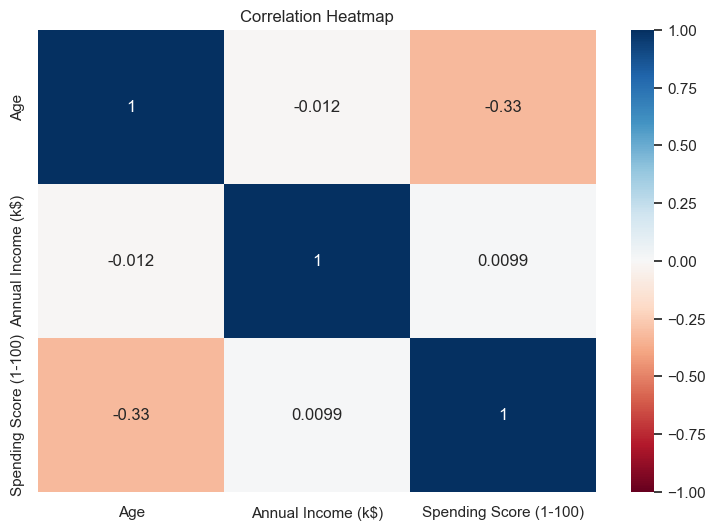

In [26]:
# Plotting the correaltion heatmap 
plt.figure(figsize = (9,6))
s = sns.heatmap(df[['Age', 'Annual Income (k$)','Spending Score (1-100)' ]].corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1,center = 0)
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap confirms that there is no strong linear relationship among the three variables. However, age and spending score show a weak negative correlation with a  pearson coefficient of -0.33.



---
### **DATA PREPROCESSING**

In this section:

- We will drop the unnecessary columns
- Scale the features to standardize their magnitudes

In [27]:
df.drop(["CustomerID"],axis=1,inplace=True)
df.drop(["Gender"],inplace=True,axis=1)
# Standardizing the features as kmeans is sensitive to the scale of the data
# this will make the features have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

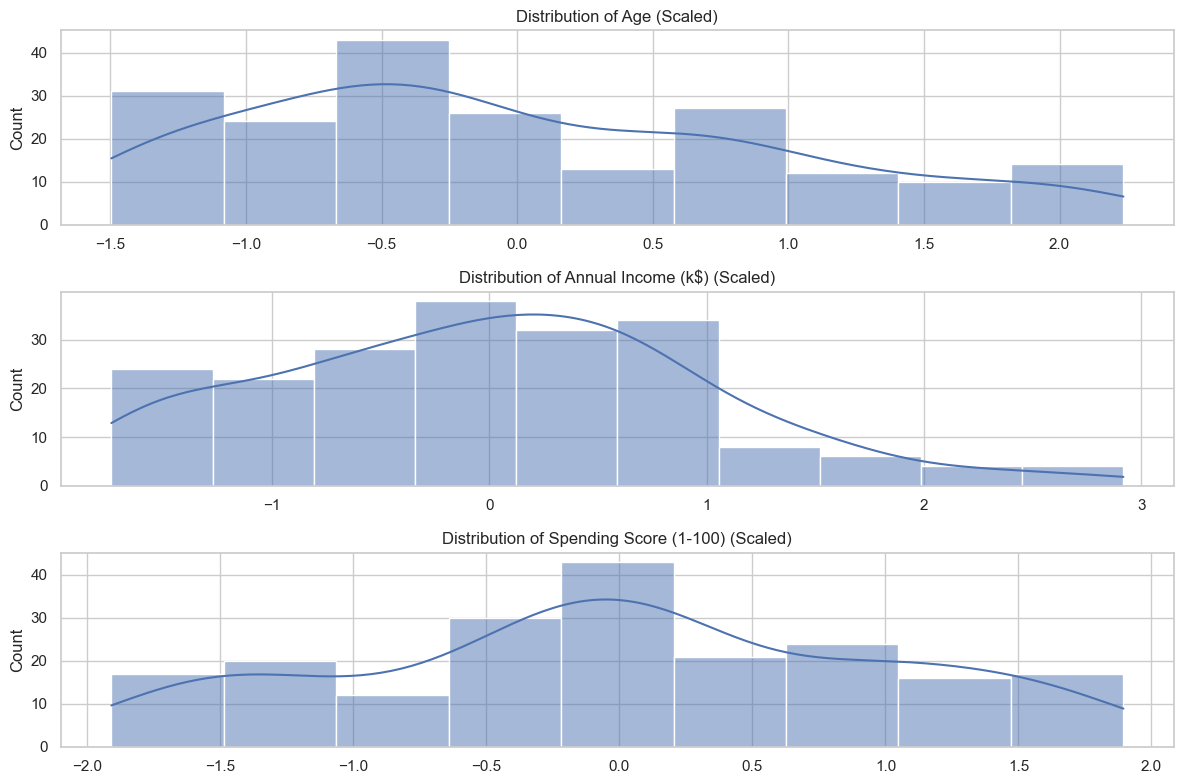

In [28]:
# Plotting the distribution of the scaled features to confirm the standardization
plt.figure(figsize=(12, 8))
for index,col in enumerate(['Age','Annual Income (k$)','Spending Score (1-100)']):
    plt.subplot(3,1,index+1)
    sns.histplot(df[:,index],kde=True)
    plt.title(f'Distribution of {col} (Scaled)')
plt.tight_layout()
plt.show()

The above distribution plot confirm that the features have been scaled to have a mean of 0 and a standard deviation of 1.

---
### **CLUSTER AND ALGORITHM VALIDATION** 

In this section we will:

- Validate the optimum number of clusters using scree plot & silhouette score method.
- Compare different algorithms to pick teh best performing algorithm.

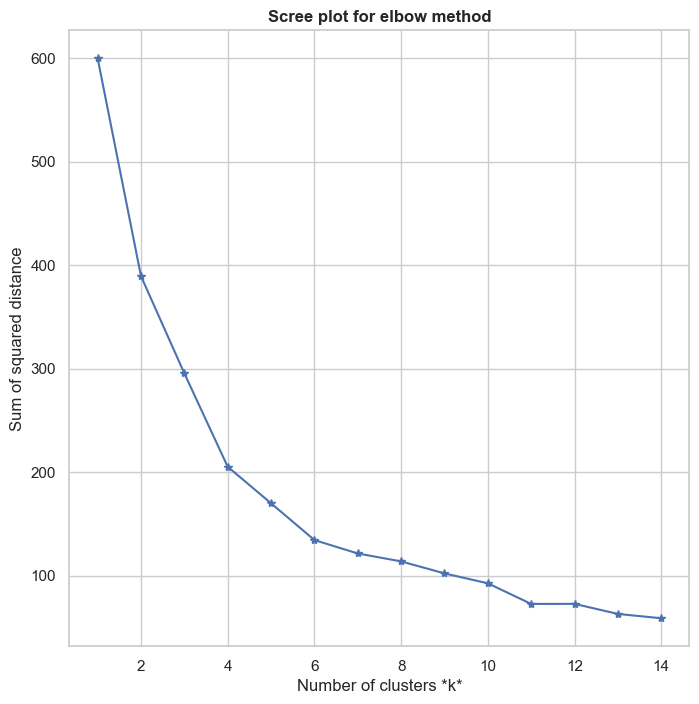

In [29]:
# Running kmeans with different number of clusters
sse = []
list_k = list(range(1, 15))
# Collecting sum of squared error in list
for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    sse.append(km.inertia_)
# Plotting the scree plot
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse,"-*")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Scree plot for elbow method',fontweight='bold')
plt.show()

Since there is no clear breakdwon point on this scree plot, we will use silhouette score method

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples

          KM        HC      GMMs   k
0   0.335472  0.317957  0.334658   2
1   0.357923  0.321489  0.295683   3
2   0.403958  0.361451  0.404378   4
3   0.408469  0.390028  0.405520   5
4   0.431065  0.420117  0.425504   6
5   0.410091  0.398295  0.417987   7
6   0.367366  0.366479  0.360017   8
7   0.374421  0.375385  0.369476   9
8   0.361870  0.380889  0.406609  10
9   0.408619  0.381198  0.408009  11
10  0.356897  0.353572  0.366833  12
11  0.385627  0.355790  0.379020  13
12  0.386648  0.353230  0.385334  14
13  0.365672  0.345435  0.364216  15


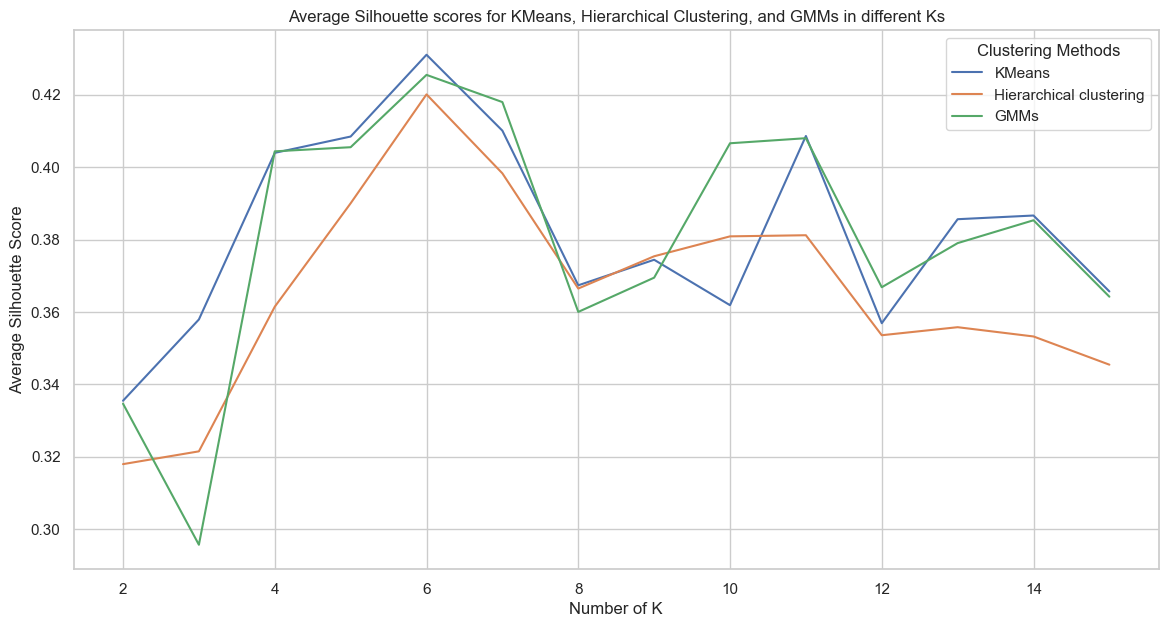

In [31]:
# Creating a function to calculate and plot avg silhouette score for all 3 clustering algorithms
def plot_km_hc_gmms_in_different_ks(df, start_k, end_k):
    avg_silhouette_scores = []

    for k in range(start_k, end_k+1):

        # KMeans algorithm
        km = KMeans(n_clusters=k, random_state=42)
        km_labels = km.fit_predict(df)

        # Hierarchical clustering algorithm
        hc = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(df)
        hc_labels = hc.labels_

        # GMMs algorithm
        gm = GaussianMixture(covariance_type="spherical", n_components=k, random_state=42).fit(df)
        gm_labels = gm.predict(df)

        # calculaiing average silhoette scores for each algorithm
        km_silhouette_vals = silhouette_samples(df, km_labels)
        hc_silhouette_vals = silhouette_samples(df, hc_labels)
        gm_silhouette_vals = silhouette_samples(df, gm_labels)
        km_avg_score = np.mean(km_silhouette_vals)
        hc_avg_score = np.mean(hc_silhouette_vals)
        gm_avg_score = np.mean(gm_silhouette_vals)
        avg_silhouette_scores.append([km_avg_score, hc_avg_score, gm_avg_score])

    df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns=['KM', 'HC', "GMMs"])
    df_avg_silhouette_scores["k"] = range(start_k, end_k+1)
    print(df_avg_silhouette_scores)
    
    # plotting silhouette scores against number of clusters

    ## creating a figure and axis
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 7)
    ax.set_title('Average Silhouette scores for KMeans, Hierarchical Clustering, and GMMs in different Ks')
    ax.plot('k', 'KM', data=df_avg_silhouette_scores) 
    ax.plot('k', 'HC', data=df_avg_silhouette_scores) 
    ax.plot('k', 'GMMs', data=df_avg_silhouette_scores) 
    ax.legend(['KMeans', "Hierarchical clustering", "GMMs"], title="Clustering Methods")
    ax.set_xlabel('Number of K')
    ax.set_ylabel("Average Silhouette Score")
    plt.show()

# Using the above function
plot_km_hc_gmms_in_different_ks(df, 2, 15)

          KM        HC      GMMs   k
0   0.335472  0.317957  0.334658   2
1   0.357923  0.321489  0.295683   3
2   0.403958  0.361451  0.404378   4
3   0.408469  0.390028  0.405520   5
4   0.431065  0.420117  0.425504   6
5   0.410091  0.398295  0.417987   7
6   0.367366  0.366479  0.360017   8
7   0.374421  0.375385  0.369476   9
8   0.361870  0.380889  0.406609  10
9   0.408619  0.381198  0.408009  11
10  0.356897  0.353572  0.366833  12
11  0.385627  0.355790  0.379020  13
12  0.386648  0.353230  0.385334  14
13  0.365672  0.345435  0.364216  15


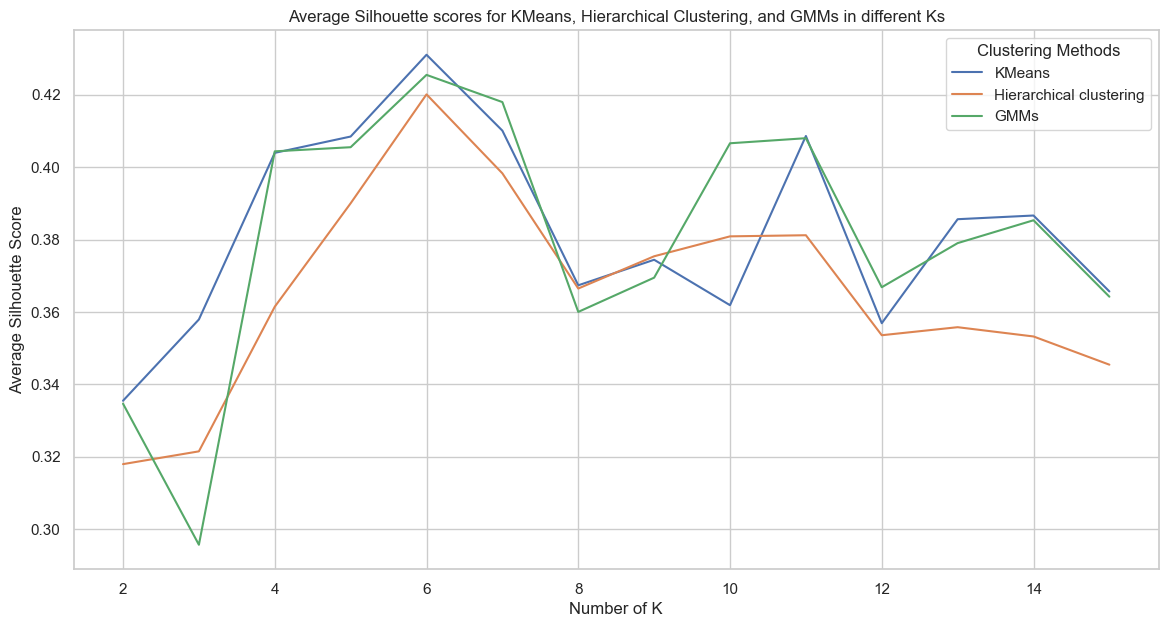

In [32]:
plot_km_hc_gmms_in_different_ks(df, 2, 15)

The above analysis confirms that 6 clusters and the k-means algorithm performs better than all other options, with a score of 0.43.

---
### **MODEL TRAINING AND CLUSTER VISUALIZATION**

In this section:

- We will train the K-means algorithm with 6 clusters.
- Calculate descriptive summary of each cluster.
- Visualize the clusters using radar chart.

In [33]:
# using kmeans with k=6
km = KMeans(n_clusters=6, random_state=42)
labels = km.fit_predict(df)

# reload data since we might want to use our customerID later
df = pd.read_csv("C:/Users/91626/Desktop/Professional/DATASETS/Mall_Customers.csv")
df['kmeans_label'] = labels

In [34]:
# calculate descriptive summaries
summary = df.groupby("kmeans_label")[['Age', 'Spending Score (1-100)']].mean()
summary['Median Annual Income(k)'] = df.groupby("kmeans_label")[['Annual Income (k$)']].median()
summary['Cnt'] = df.groupby('kmeans_label').CustomerID.count().values
summary['Male Cnt'] = df[df.Genre=="Male"].groupby("kmeans_label").CustomerID.count().values
summary['Female Cnt'] = df[df.Genre=="Female"].groupby("kmeans_label").CustomerID.count().values
summary['Male%'] = summary['Male Cnt']/summary['Cnt']
summary['Female%'] = summary['Female Cnt']/summary['Cnt']
summary.rename(columns={'Age':'Avg Age', "Spending Score (1-100)":'Avg Spending Score'}, inplace=True)

final_summary = summary[['Avg Age','Avg Spending Score',"Median Annual Income(k)","Cnt","Male%","Female%"]].sort_index(ascending=True)
final_summary

,Avg Age,Avg Spending Score,Median Annual Income(k),Cnt,Male%,Female%
kmeans_label,,,,,,
0,56.333333,49.066667,54.0,45,0.422222,0.577778
1,32.692308,82.128205,79.0,39,0.461538,0.538462
2,25.560000,76.240000,25.0,25,0.440000,0.560000
3,26.125000,44.450000,60.0,40,0.400000,0.600000
4,44.000000,17.933333,87.0,30,0.533333,0.466667
5,45.523810,19.380952,25.0,21,0.380952,0.619048


In [35]:
temp = final_summary

temp.reset_index(level=0, inplace=True)
temp["kmeans_label"]=temp["kmeans_label"].map({0: 'Medium Income, Medium Spending Older People', 
                                              1: 'High Income, High Spending Young Aged People',
                                              2: 'Low Income, High Spending Young People',
                                              3: 'Medium Income, Medium Spending Young People',
                                              4: 'Highest Income, Lowest Spending Middle Aged People',
                                              5: 'Low Income, Lowest Spending Middle Aged People'})
temp.rename(columns={'kmeans_label':'Group'}, inplace=True)
temp = temp.reindex(columns=['Group', 'Avg Age', 'Avg Spending Score', 'Male%', 'Female%', 'Median Annual Income(k)',
       'Cnt'])
temp

,Group,Avg Age,Avg Spending Score,Male%,Female%,Median Annual Income(k),Cnt
0,"Medium Income, Medium Spending Older People",56.333333,49.066667,0.422222,0.577778,54.0,45
1,"High Income, High Spending Young Aged People",32.692308,82.128205,0.461538,0.538462,79.0,39
2,"Low Income, High Spending Young People",25.560000,76.240000,0.440000,0.560000,25.0,25
3,"Medium Income, Medium Spending Young People",26.125000,44.450000,0.400000,0.600000,60.0,40
4,"Highest Income, Lowest Spending Middle Aged Pe...",44.000000,17.933333,0.533333,0.466667,87.0,30
5,"Low Income, Lowest Spending Middle Aged People",45.523810,19.380952,0.380952,0.619048,25.0,21


In [36]:
# Calculating the percentage of males and females in each cluster
temp[['Male%']] = temp[['Male%']]*100
temp[['Female%']] = temp[['Female%']]*100

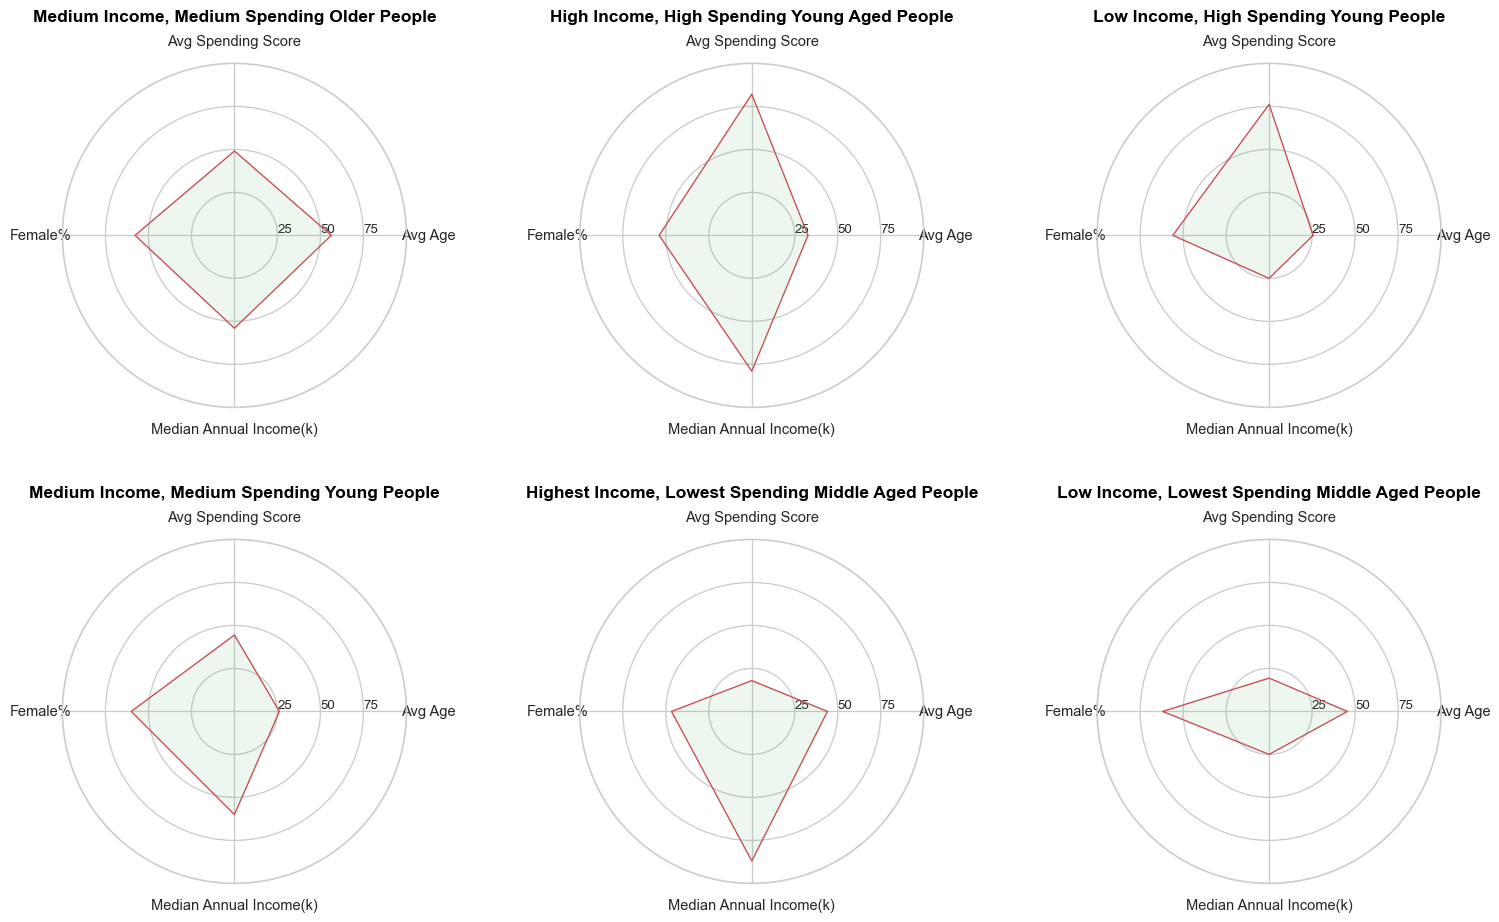

In [37]:
# creating function to plot radar chart for each cluster
def multiple_radars(df, columns, row, title):
    '''
    This function plots the radar chart for each cluster
    Parameters:
        df (DataFrame): The input data for clustering.
        columns (list): The list of columns to be plotted on the radar chart.
        row (int): The row number of the radar chart.
        title (str): The title of the radar chart.
    returns:
        It plots the radar chart and dont return any value as output
    '''
    from math import pi
    N = len(columns)
    columns_no_need = df[df.columns.difference(columns)]
    
    # repeating the first value to close the circular graph
    values=df.loc[row].drop(columns_no_need).values.flatten().tolist()
    values += values[:1]

    # dividing the circle into even parts
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initializing the plot
    ax = plt.subplot(2, 3, row+1, polar=True) 

    # creating one axe per variable and plotting it
    plt.xticks(angles[:-1], columns, size=11)
    plt.title(title, size=13, y=1.1, fontweight="bold", color='black')
    # adding ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], size=10)
    plt.ylim(0,100)

    # Plotting the data
    ax.plot(angles, values, linewidth=1, color='r', linestyle='solid')
    # Filling the area
    ax.fill(angles, values, 'g', alpha=0.1)

my_dpi=96
plt.figure(figsize=(1600/my_dpi, 1000/my_dpi), dpi=my_dpi)

# applying the function to plot radar chart for each cluster
columns=['Avg Age', 'Avg Spending Score', 'Female%', 'Median Annual Income(k)']
titles = temp['Group'].tolist()
for i in range(0,6): 
    multiple_radars(temp, columns, i, titles[i])
plt.tight_layout(pad=3.0)


---
### ****CREDITS AND CONTACT****

**Created by:** Krishna Kasera  
**GitHub:** [https://github.com/Krishna-Kasera](https://github.com/Krishna-Kasera) | **Contact:** KKasera025@outlook.com
